# Opgave 3 - Sprong motocrosser

In de syllabus hebben we oefening 3 - sprong motocrosser manueel opgelost (= op papier).

In het vervolg van deze opgave gebruiken we Python om het model te visualiseren.

## Stap 1: vul de berekende constanten in

In [14]:
import numpy as np
import math
from matplotlib import pyplot as plt
%matplotlib widget
import ipywidgets

# TODO 1: neem de berekende waarden van je papier over

vm1 = 20  # m/s  snelheid motocrosser
hs1 = 4 # m  hoogte schans
thetas1 = np.pi / 3 # hoek van de schans

## Stap 2

De functie **berekenHoogte** is de vertaling van je papieren model naar een Python-functie.
De functie neemt volgende parameters:
  - *x*: de afstand waarop je de hoogte wil kennen
  - *x0*: beginpositie van de motorcrosser
  - *y*: beginhoogte van de motorcrosser
  - *vx0*: horizontale beginsnelheid
  - *vy0*: verticale beginsnelheid 


Waarom is in deze functie de regel *y = max(0, y0 + vy0 * t- 0.5 * 9.81 * t**2)* toegevoegd?

In [15]:
def berekenHoogte(x, x0, y0, vx0, vy0):
    t = (x - x0)/vx0
    y = max(0, y0+vy0*t-0.5*9.81*t**2)
    return y

Zo dadelijk willen we de hoogte van de motorcrosser plotten in functie van x, bijvoorbeeld van 0 tot 100m.
De **xAs** van de plot is dan een lijst van afstanden.
De **yAs** bekom je door voor elke afstand de hoogte te berekenen.
Hiervoor hebben we een lokale functie nodig die alléén *x* als parameter heeft.

De plotfunctie is al grotendeels afgewerkt, maar de lokale functie nog niet. Werk die uit.


In [16]:
def plotProjectielBeweging(x0, y0, vx0, vy0, xMax):
    def berekenH(x):
        # TODO 2: gebruik functie berekenHoogte met de juiste parameters
        return berekenHoogte(x, x0, y0, vx0, vy0)

    xAs=np.linspace(0,xMax,250)
    yAs=list(map(berekenH, xAs))

    plt.figure()
    plt.plot(xAs, yAs)
    plt.xlabel("Afstand (m)")
    plt.ylabel("Hoogte (m)")
    plt.grid(True, which="both")
    plt.show()

## Stap 3: Teken het concrete model voor de motorcrosser

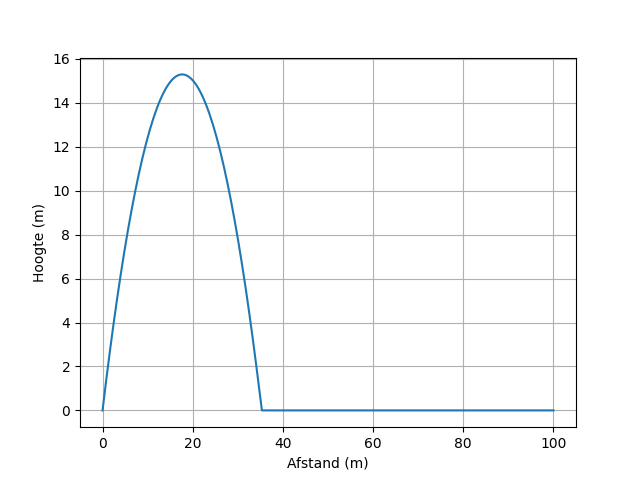

In [18]:
def plotMotorCrosser():
    # TODO 3a: neem de juiste waarden van de eerste codecel over 
    x0mc = 0
    y0mc = 0
    v0mc = vm1
    # TODO 3b: bereken de juiste waarden van de motorcrosser door de snelheid te ontbinden volgens x en y
    vx0mc = vm1 * math.cos(thetas1)
    vy0mc = vm1 * math.sin(thetas1)
    tMax = 5
    xMax = x0mc+v0mc*tMax
    plotProjectielBeweging(x0mc, y0mc, vx0mc, vy0mc, xMax)

plotMotorCrosser()

Is dit het resultaat wat je verwachtte ?


## Stap 4

In stappen 1 t.e.m. 3 hebben we volgende parameters constant gehouden:
- snelheid van de motorrijder
- hoogte van de schans
- hoek van de schans

Dankzij de sliders van ipywidgets kunnen we gemakkelijk Python-code schrijven om daar mee te experimenteren.
De code hebben wij al voor jullie geschreven, maar probeer wel de code te begrijpen. 

Het spelen met de sliders en nadenken over het effect moeten jullie doen. Doe dat door onderstaande codecel uit te voeren.

In [20]:
def plotProjectielBeweging2(hs , vm ,thetas_graden):
    thetas1=thetas_graden*np.pi/180
    y0 = hs
    vx0 = vm*math.cos(thetas1)
    vy0 = vm * math.sin(thetas1)
    x0 = 0
    # tMax wordt berekend als de tijd waarop de motorijder de grond raakt
    tMax=(-vy0 - np.sqrt(vy0**2- 4*(-9.81/2)*y0))/(2*(-9.81/2))
    xMax = x0+vx0*tMax
    plotProjectielBeweging(x0, y0, vx0, vy0, xMax)

def voorbeeldProjectiel():
    sliderhs1 = ipywidgets.IntSlider(value=4, min=0, max=20, step = 0.5, description = "h schans (m)")
    slidervm1 = ipywidgets.IntSlider(value=20, min=0, max=50, step = 0.5, description = "v moto (m/s)")
    sliderthetas1 = ipywidgets.IntSlider(value=60, min=0, max=180, step = 5, description = "hoek schans (rad)")

    grafiek = ipywidgets.interactive(plotProjectielBeweging2, hs=sliderhs1, vm=slidervm1, thetas_graden = sliderthetas1)
    display(grafiek)

voorbeeldProjectiel()

interactive(children=(IntSlider(value=4, description='h schans (m)', max=20, step=0), IntSlider(value=20, desc…

## Stap 5

In de vorige stap zien we de eindafstand afhankelijk is van de snelheid.
In deze stap zetten we de hoogte en de hoek van de schans terug vast en plotten we de eindafstand in functie van de snelheid.

De functie die de afstand berekent afhankelijk van de snelheid hebben we al geschreven.
Je moet die zelf nog gebruiken om de waarden op de y-as te bepalen.

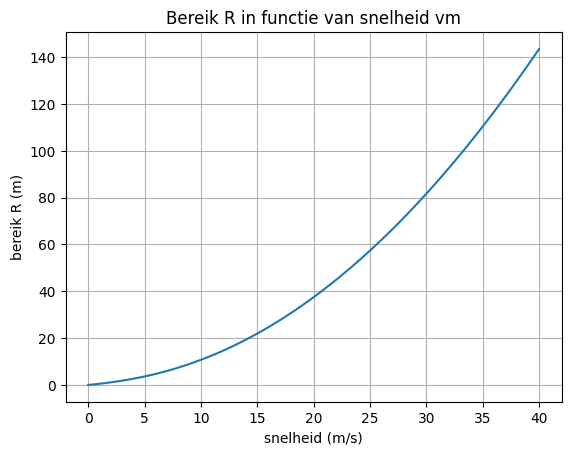

In [11]:
hs1=4 # m  hoogte schans
thetas1 = np.pi / 3 # hoek van de schans

def afstandVersusSnelheid(v):
    theta1 = np.pi / 3
    R=(v*math.cos(theta1)/9.81)*(v*math.sin(theta1)+np.sqrt((v*math.sin(theta1))**2+2*9.81*hs1))
    return R

def plotBereikVersusSnelheid():
    snelheden = np.linspace(0,vm1,100)
    # TODO 5: bereken de y-as door de functie afstandVersusSnelheid op alle snelheden
    yAs = list(map(afstandVersusSnelheid, snelheden))
    
    plt.figure()
    plt.plot(snelheden, yAs)
    plt.xlabel('snelheid (m/s)')
    plt.ylabel('bereik R (m)')
    plt.title("Bereik R in functie van snelheid vm")
    plt.grid()
    plt.show()

plotBereikVersusSnelheid()